<a href="https://colab.research.google.com/github/MGrgat1/deep_learning_in_google_colab/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import math
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device("cuda")


Create a plot a sine function (using the CPU)

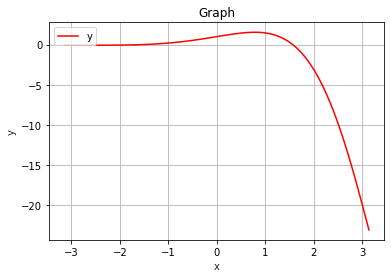

In [23]:
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.exp(x)*torch.cos(x)
plt.plot(x.cpu(), y.cpu(), '-r', label='y')
plt.title('Graph')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Create a four-parameter polynomial to approximate a given function. This version of the code uses NN and SGD optimizer.

0 45290.421875


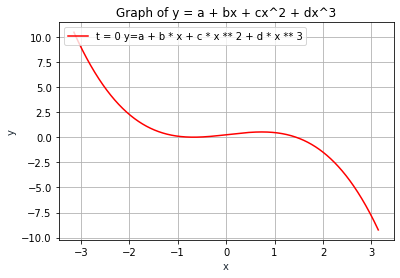

100 4137.03662109375
200 3328.797607421875
300 2761.563232421875
400 2363.27783203125
500 2083.49169921875


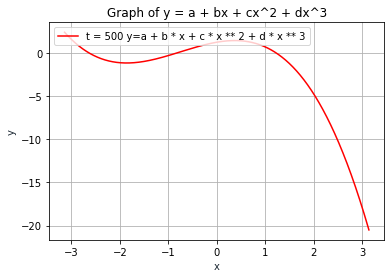

600 1886.864013671875
700 1748.62060546875
800 1651.389404296875
900 1582.9775390625
1000 1534.82568359375


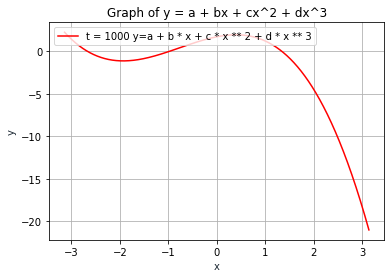

1100 1500.9241943359375
1200 1477.046875
1300 1460.225830078125
1400 1448.371826171875
1500 1440.0162353515625


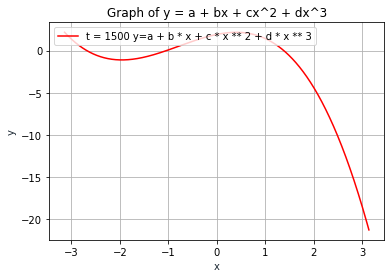

1600 1434.125244140625
1700 1429.971435546875
1800 1427.0408935546875
1900 1424.973876953125
2000 1423.51513671875


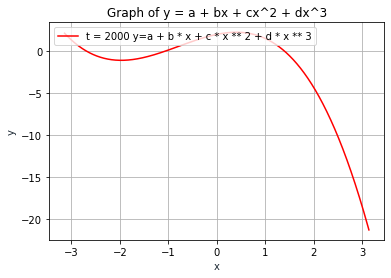

Result: y = 1.9985512495040894 + 1.19392991065979 x + -1.1745790243148804 x^2 + -0.4993869364261627 x^3


In [24]:
# Every x in the polynomial (x, x^2, x^3) is its own function
# unsqueeze maps from (2000) to (2000, 1)
# pow uses all x parameters as powers for the tensor p
p = torch.tensor([1, 2, 3], device=device)
xx = x.unsqueeze(-1).pow(p)

# a simple linear sequential model
# input - 3, output - 1
# Flatten maps the output to a 1D vector
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
).cuda()

# mean square error with error summation
loss_fn = torch.nn.MSELoss(reduction='sum').cuda()

learning_rate = 1e-6

#SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# the training loop
for t in range(2001):
    # forward propagation
    # y = a + b x + c x^2 + d x^3
    y_pred = model(xx)

    # calculate the error using a built-in error function
    loss = loss_fn(y_pred, y)
    if t % 100 == 0:
        print(t, loss.item())

    # reset the gradient using the optimizer
    optimizer.zero_grad()

    # backpropagation
    # calculates the gradient with respect to all three parameters of the model
    # all parameters within the model are tensors with the property requires_grad=True
    loss.backward()

    # update the parameters using the optimizer
    optimizer.step()

    # get the parameters
    linear_layer = model[0]

    a = linear_layer.bias.item()
    b = linear_layer.weight[:, 0].item()
    c = linear_layer.weight[:, 1].item()
    d = linear_layer.weight[:, 2].item()

    # display the learning process
    if t % 500 == 0:
        y_graph = a + b * x + c * x ** 2 + d * x ** 3
        plt.plot(x.cpu().detach(), y_graph.cpu().detach(), '-r', label='t = ' + str(t) + ' y=a + b * x + c * x ** 2 + d * x ** 3')
        plt.title('Graph of y = a + bx + cx^2 + dx^3')
        plt.xlabel('x', color='#1C2833')
        plt.ylabel('y', color='#1C2833')
        plt.legend(loc='upper left')
        plt.grid()
        plt.show()

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')